<h1 style="text-align: center; font-weight: bold; font-size: 30px; 
           font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
           color: #2C3E50; padding: 20px; border-bottom: 2px solid #2C3E50;">
    Electric Vehicle Trends and Sustainability Metrics (2017–Present)
</h1>


## Importing Required Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the Dataset

In [29]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\mayan\Downloads\NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017 (1).csv")
# Display the rows 
df.head(11)


,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,02/28/2025,05/28/2020,Tesla,Model Y,NaN,10509,BEV,Purchase,3.093,592.890,2000
1,02/28/2025,03/30/2017,Audi,A3 e-tron,Albany,12189,PHEV,Purchase,1.629,292.890,500
2,02/28/2025,03/30/2017,Toyota,Prius Prime,Albany,12211,PHEV,Purchase,2.955,440.109,1100
3,02/28/2025,04/03/2017,Kia,Soul EV,Albany,12205,BEV,Lease,2.718,592.890,1700
4,02/28/2025,04/08/2017,Toyota,Prius Prime,Albany,12110,PHEV,Purchase,2.955,440.109,1100
5,02/28/2025,04/10/2017,Chevrolet,Volt,Albany,12203,PHEV,Purchase,2.648,525.030,1700
6,02/28/2025,04/10/2017,Chevrolet,Volt,Albany,12208,PHEV,Purchase,2.648,525.030,1700
7,02/28/2025,04/11/2017,Toyota,Prius Prime,Albany,12054,PHEV,Purchase,2.955,440.109,1100
8,02/28/2025,04/11/2017,Kia,Soul EV,Albany,12067,BEV,Lease,2.718,592.890,1700
9,02/28/2025,04/11/2017,Toyota,Prius Prime,Albany,12186,PHEV,Purchase,2.955,440.109,1100


## Basic Information

In [30]:
#  Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Data through Date                          189597 non-null  object 
 1   Submitted Date                             189597 non-null  object 
 2   Make                                       189597 non-null  object 
 3   Model                                      189530 non-null  object 
 4   County                                     189596 non-null  object 
 5   ZIP                                        189597 non-null  int64  
 6   EV Type                                    189597 non-null  object 
 7   Transaction Type                           189593 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  189597 non-null  float64
 9   Annual Petroleum Reductions (gallons)      189597 non-null  float64
 10  Rebate A

##  Unique Value Count

In [31]:
# Unique Value Count
df.nunique()


Data through Date                               1
Submitted Date                               2768
Make                                           34
Model                                         123
County                                         62
ZIP                                          1615
EV Type                                         2
Transaction Type                                2
Annual GHG Emissions Reductions (MT CO2e)     105
Annual Petroleum Reductions (gallons)          72
Rebate Amount (USD)                             6
dtype: int64

## Statistical summary

In [32]:
# Statistical summary of numerical features
print("Summary statistics of numeric columns:\n")
print(df.describe())

Summary statistics of numeric columns:

                 ZIP  Annual GHG Emissions Reductions (MT CO2e)  \
count  189597.000000                              189597.000000   
mean    11950.547261                                   2.408218   
std      1268.144878                                   1.118065   
min      6390.000000                                  -1.785000   
25%     11101.000000                                   2.198000   
50%     11729.000000                                   2.943000   
75%     12534.000000                                   3.093000   
max     14905.000000                                   4.836000   

       Annual Petroleum Reductions (gallons)  Rebate Amount (USD)  
count                          189597.000000        189597.000000  
mean                              511.973215           909.674731  
std                               132.350016           603.904064  
min                                -7.110000             0.000000  
25%             

##  Cleaning Column Names

In [33]:
# Replace spaces with underscores and remove parentheses for consistency
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Data_through_Date                        189597 non-null  object 
 1   Submitted_Date                           189597 non-null  object 
 2   Make                                     189597 non-null  object 
 3   Model                                    189530 non-null  object 
 4   County                                   189596 non-null  object 
 5   ZIP                                      189597 non-null  int64  
 6   EV_Type                                  189597 non-null  object 
 7   Transaction_Type                         189593 non-null  object 
 8   Annual_GHG_Emissions_Reductions_MT_CO2e  189597 non-null  float64
 9   Annual_Petroleum_Reductions_gallons      189597 non-null  float64
 10  Rebate_Amount_USD               

## Renaming Key Columns for Simplicity

In [34]:
#  Rename key columns for simplicity 
df.rename(columns={
    "Annual_GHG_Emissions_Reductions_MT_CO2e": "GHG_Reductions",
    "Annual_Petroleum_Reductions_gallons": "Petroleum_Reductions",
    "Rebate_Amount_USD": "Rebate_Amount"
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data_through_Date     189597 non-null  object 
 1   Submitted_Date        189597 non-null  object 
 2   Make                  189597 non-null  object 
 3   Model                 189530 non-null  object 
 4   County                189596 non-null  object 
 5   ZIP                   189597 non-null  int64  
 6   EV_Type               189597 non-null  object 
 7   Transaction_Type      189593 non-null  object 
 8   GHG_Reductions        189597 non-null  float64
 9   Petroleum_Reductions  189597 non-null  float64
 10  Rebate_Amount         189597 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 15.9+ MB


## Checking for Missing Values

In [35]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]
print("Missing values in columns:\n")
print(missing_values)


Missing values in columns:

Model               67
County               1
Transaction_Type     4
dtype: int64


## Verify values

In [36]:
df.isnull().sum()

Data_through_Date        0
Submitted_Date           0
Make                     0
Model                   67
County                   1
ZIP                      0
EV_Type                  0
Transaction_Type         4
GHG_Reductions           0
Petroleum_Reductions     0
Rebate_Amount            0
dtype: int64

## Counting unique values

In [37]:
# Counting unique values
print("\nUnique values in categorical columns:\n")
for col in df.select_dtypes(include='object').columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique value{'s' if unique_count > 1 else ''}")



Unique values in categorical columns:

Data_through_Date: 1 unique value
Submitted_Date: 2768 unique values
Make: 34 unique values
Model: 123 unique values
County: 62 unique values
EV_Type: 2 unique values
Transaction_Type: 2 unique values


## Columns names

In [38]:
print(df.columns)
df.info()

Index(['Data_through_Date', 'Submitted_Date', 'Make', 'Model', 'County', 'ZIP',
       'EV_Type', 'Transaction_Type', 'GHG_Reductions', 'Petroleum_Reductions',
       'Rebate_Amount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189597 entries, 0 to 189596
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data_through_Date     189597 non-null  object 
 1   Submitted_Date        189597 non-null  object 
 2   Make                  189597 non-null  object 
 3   Model                 189530 non-null  object 
 4   County                189596 non-null  object 
 5   ZIP                   189597 non-null  int64  
 6   EV_Type               189597 non-null  object 
 7   Transaction_Type      189593 non-null  object 
 8   GHG_Reductions        189597 non-null  float64
 9   Petroleum_Reductions  189597 non-null  float64
 10  Rebate_Amount         189597 non-null  int64  
dtypes

 ## Calculates the correlation and covariance between the Rebate Amount and other numeric variables

In [39]:
df_cleaned = df.dropna(subset=['Rebate_Amount'])

numeric_columns = df_cleaned.select_dtypes(include='number')

# Correlation
print("Correlation with Rebate_Amount:\n")
print(numeric_columns.corr()['Rebate_Amount'].sort_values(ascending=False))

# Covariance

print("\nCovariance with Rebate_Amount:\n")
print(numeric_columns.cov()['Rebate_Amount'].sort_values(ascending=False))


Correlation with Rebate_Amount:

Rebate_Amount           1.000000
GHG_Reductions          0.298399
Petroleum_Reductions    0.228687
ZIP                     0.086459
Name: Rebate_Amount, dtype: float64

Covariance with Rebate_Amount:

Rebate_Amount           364700.118360
ZIP                      66213.484776
Petroleum_Reductions     18278.197388
GHG_Reductions             201.479907
Name: Rebate_Amount, dtype: float64


# Data Visualization and Exploratory Analysis

In this section, we explore the dataset using various visualizations to uncover insights related to electric vehicle rebates in New York. The focus is on identifying trends in rebate distribution across EV types, models, counties, and environmental impact metrics like GHG and petroleum reductions.


## Scatter Plot: Relationship Between Rebate Amount and GHG Reductions by EV Type

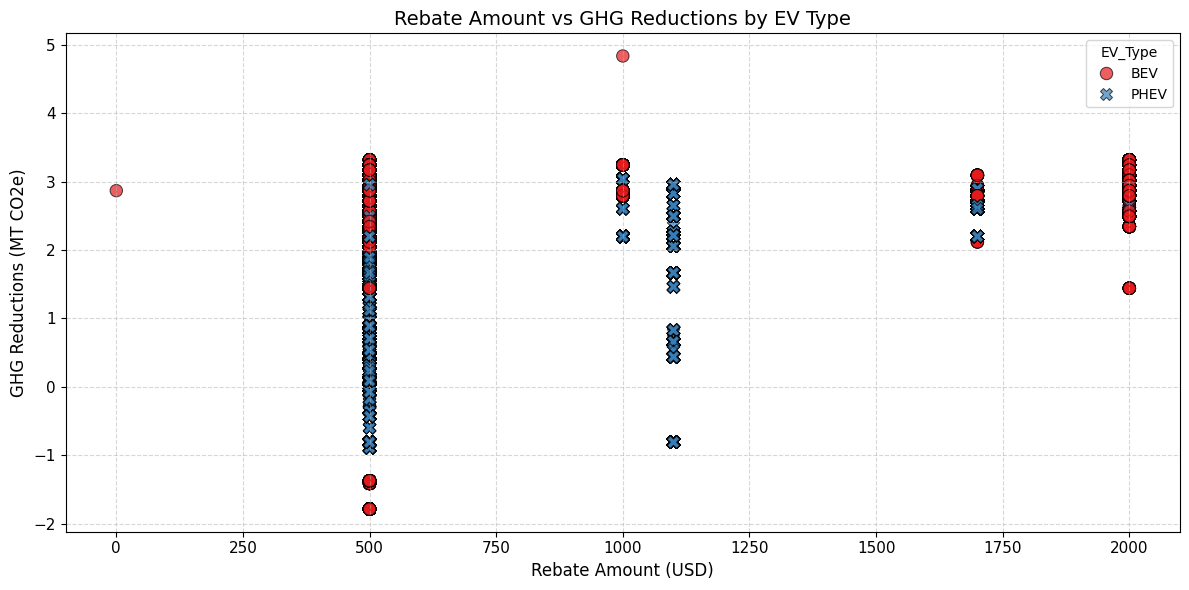

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Rebate_Amount',
    y='GHG_Reductions',
    hue='EV_Type',
    style='EV_Type',
    palette='Set1',
    s=80,
    edgecolor='black',
    alpha=0.7
)
plt.title('Rebate Amount vs GHG Reductions by EV Type', fontsize=14)
plt.xlabel('Rebate Amount (USD)', fontsize=12)
plt.ylabel('GHG Reductions (MT CO2e)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


This scatter plot shows the relationship between the rebate amount and greenhouse gas (GHG) reductions, categorized by electric vehicle (EV) type. Battery Electric Vehicles (BEVs) generally receive higher rebates and contribute to greater GHG reductions compared to Plug-in Hybrid Electric Vehicles (PHEVs). The clustering of points suggests that higher rebates are associated with higher environmental benefits. Different colors and markers help distinguish between EV types clearly.










## EV Type Distribution Analysis

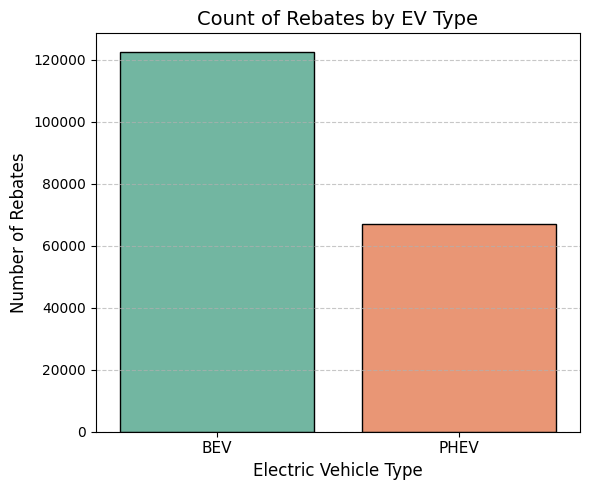

In [41]:
plt.figure(figsize=(6, 5))
sns.countplot(
    data=df,
    x='EV_Type',
    hue='EV_Type',
    palette='Set2',
    edgecolor='black',
    legend=False
)

plt.title('Count of Rebates by EV Type', fontsize=14)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Number of Rebates', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


This bar chart displays the count of rebates distributed for each electric vehicle (EV) type. It highlights that Battery Electric Vehicles (BEVs) have received more rebates compared to Plug-in Hybrid Electric Vehicles (PHEVs). This suggests a higher adoption rate or policy preference towards fully electric vehicles over hybrids. The clear difference in counts reflects consumer trends and potential incentives driving BEV popularity.


## Rebate Distribution by EV Type

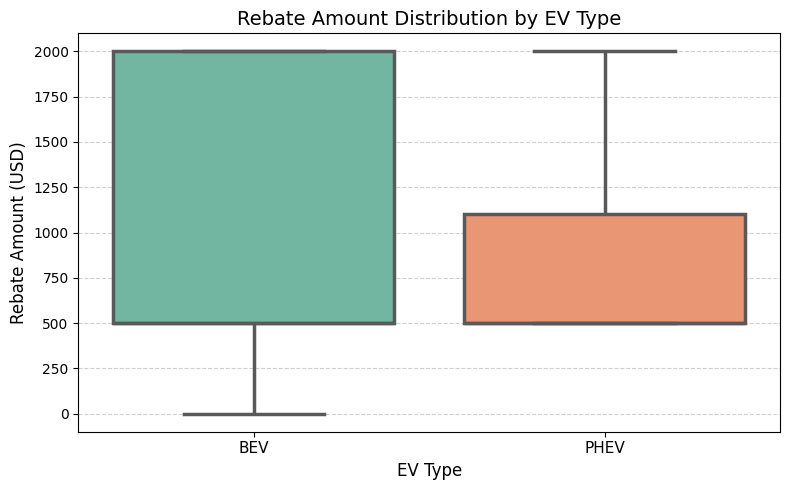

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='EV_Type',
    y='Rebate_Amount',
    hue='EV_Type',
    palette='Set2',
    linewidth=2.5,
    fliersize=4,
    dodge=False
)

plt.title('Rebate Amount Distribution by EV Type', fontsize=14)
plt.xlabel('EV Type', fontsize=12)
plt.ylabel('Rebate Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


This box plot shows how rebate amounts vary between different EV types. Battery Electric Vehicles (BEVs) generally receive higher and more consistent rebate amounts compared to Plug-in Hybrid Electric Vehicles (PHEVs), which show a broader spread. The central lines indicate median values, and the spread of the boxes reveals variability—BEVs tend to have less variation in rebate distribution than PHEVs.

## Correlation Between Key Numeric Features

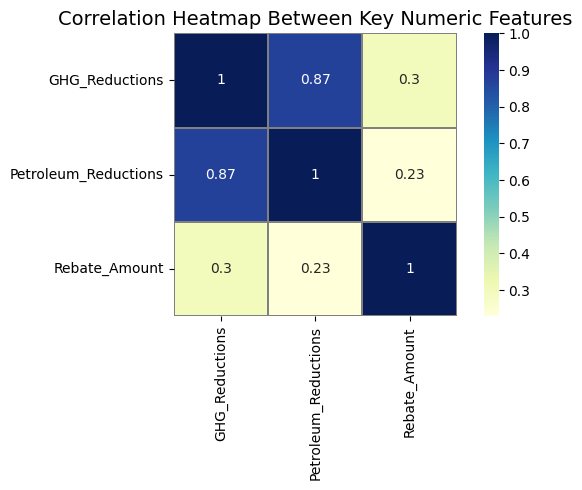

In [43]:
plt.figure(figsize=(7, 5))
numeric_cols = ['GHG_Reductions', 'Petroleum_Reductions', 'Rebate_Amount']
corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='YlGnBu',
    linewidths=1.2,            
    linecolor='gray',
    square=True
)

plt.title('Correlation Heatmap Between Key Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()


This heatmap illustrates the correlation between GHG Reductions, Petroleum Reductions, and Rebate Amount. There is a moderate positive correlation between GHG and Petroleum Reductions, suggesting that vehicles reducing greenhouse gases also tend to reduce fuel use. However, Rebate Amount shows only a weak correlation with the other two, indicating that rebates are not directly tied to emission or fuel savings.


## Top 10 Car Brands by Average GHG Reductions

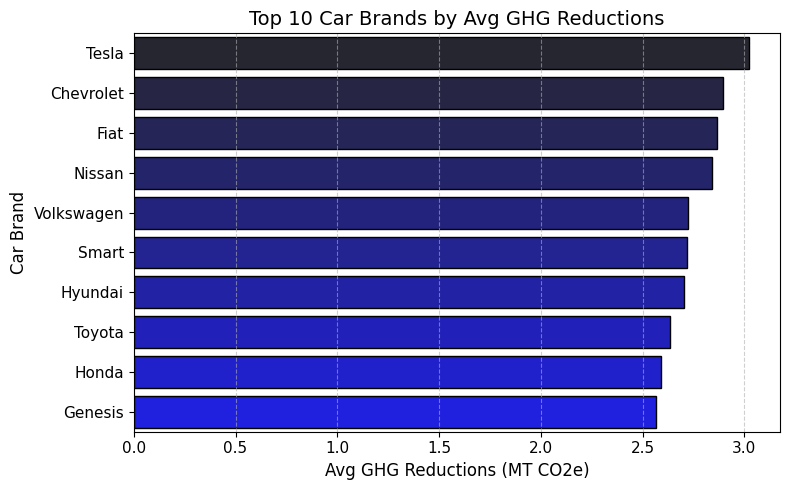

In [44]:

top_brands = df.groupby('Make')['GHG_Reductions'].mean().sort_values(ascending=False).head(10)
top_brands_df = top_brands.reset_index()
top_brands_df.columns = ['Make', 'Avg_GHG_Reductions']


plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_brands_df,
    x='Avg_GHG_Reductions',
    y='Make',
    hue='Make',
    palette='dark:blue',
    edgecolor='black',
    legend=False
)

plt.title('Top 10 Car Brands by Avg GHG Reductions', fontsize=14)
plt.xlabel('Avg GHG Reductions (MT CO2e)', fontsize=12)
plt.ylabel('Car Brand', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


Tesla leads all car brands with the highest average greenhouse gas (GHG) reductions, exceeding 3.0 metric tons of CO2e. Chevrolet, Fiat, and Nissan follow closely behind, each achieving slightly below 3.0 MT CO2e. The data indicates that premium electric-focused brands tend to offer greater environmental benefits. Overall, the top 10 brands maintain fairly high and consistent GHG reductions, highlighting their contribution to emission reduction efforts.

## Objective 1:
### Understanding Relationships Between Rebate Amount, GHG Reduction, and Petroleum Reduction
This heatmap visualizes the strength of the linear relationships between rebate amount and environmental benefits.
We focused on three numerical features: rebate value, GHG reduction, and petroleum reduction.
The goal is to understand how these factors move together across the dataset.

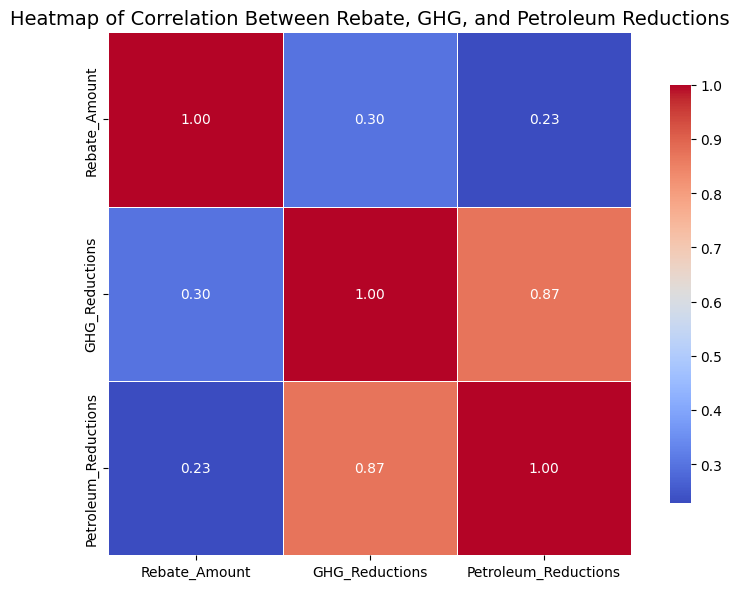

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns
corr_data = df[['Rebate_Amount', 'GHG_Reductions', 'Petroleum_Reductions']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation values
    cmap='coolwarm',  # Color palette
    fmt=".2f",        # Format the numbers
    linewidths=0.5,   # Add lines between cells
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title('Heatmap of Correlation Between Rebate, GHG, and Petroleum Reductions', fontsize=14)
plt.tight_layout()
plt.show()


### Analysis Result:
The heatmap shows the correlation between Rebate Amount, GHG Reductions, and Petroleum Reductions.
There is a strong positive correlation (0.87) between GHG Reductions and Petroleum Reductions, indicating that reductions in greenhouse gases often align with reduced petroleum usage.
However, the correlation between Rebate Amount and the other two variables is relatively weak (0.30 with GHG and 0.23 with Petroleum), suggesting that higher rebates do not strongly influence environmental benefits.
This implies that while rebates may encourage adoption, they alone do not guarantee higher environmental impact.
It may be necessary to refine rebate targeting or combine incentives with stricter efficiency standards to improve outcomes.



## Objective 2
### Identifying the Most Popular EV Models for Rebates
This bar chart displays the top electric vehicle (EV) models based on the number of rebates issued. It provides a quick overview of which EV models are most frequently purchased or leased with state incentives.

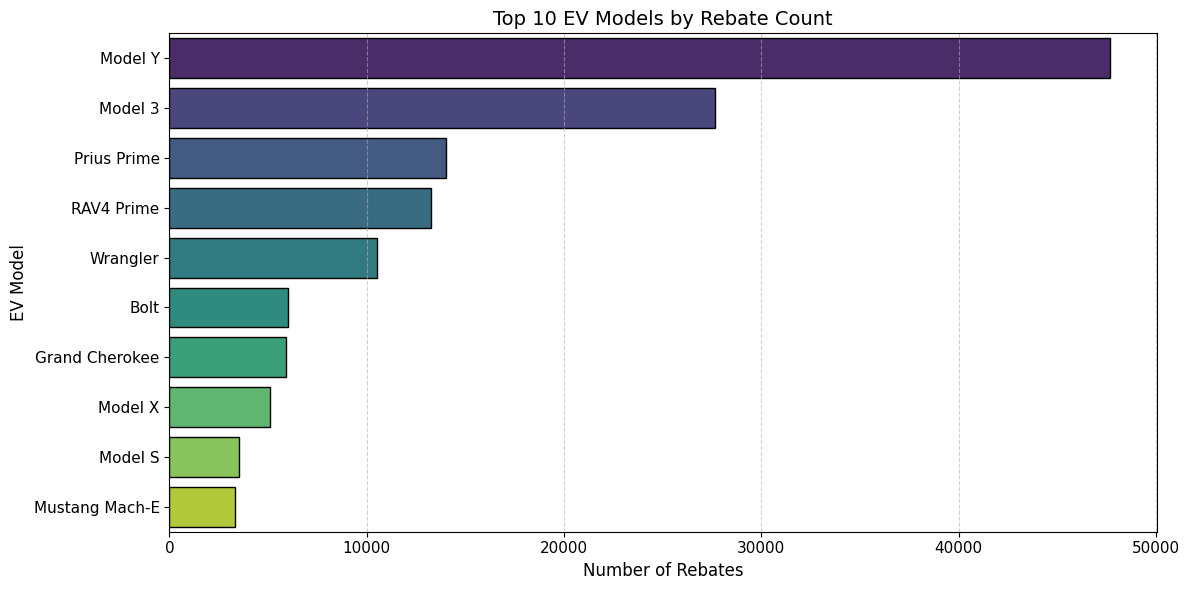

In [46]:
top_models = df['Model'].value_counts().head(10)
top_models_df = top_models.reset_index()
top_models_df.columns = ['Model', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_models_df,
    x='Count',
    y='Model',
    hue='Model',
    palette='viridis',
    edgecolor='black',
    legend=False
)

plt.title('Top 10 EV Models by Rebate Count', fontsize=14)
plt.xlabel('Number of Rebates', fontsize=12)
plt.ylabel('EV Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


### Analysis Result:
The chart highlights that a few electric vehicle (EV) models dominate rebate claims, with the Tesla Model 3 standing out as the clear leader. Toyota’s Prius Prime and RAV4 Prime also show a strong presence, reflecting their widespread acceptance and appeal in the market. In contrast, Tesla’s premium models like the Model X and Model S have significantly fewer rebates, which could point to consumer sensitivity to higher prices. Interestingly, models like the Mustang Mach-E and the Jeep Wrangler are also among the top 10, indicating a growing diversity in EV preferences. Overall, the concentration of rebates among select models suggests that consumer choices and rebate policies are closely aligned with affordability, performance, and brand trust.



## Objective 3
### Understanding the Distribution of Rebate Amounts
This KDE (Kernel Density Estimation) plot helps visualize how rebate amounts are distributed across the dataset. It provides a smooth curve that represents the probability density of different rebate values without assuming a fixed bin size, like in histograms.

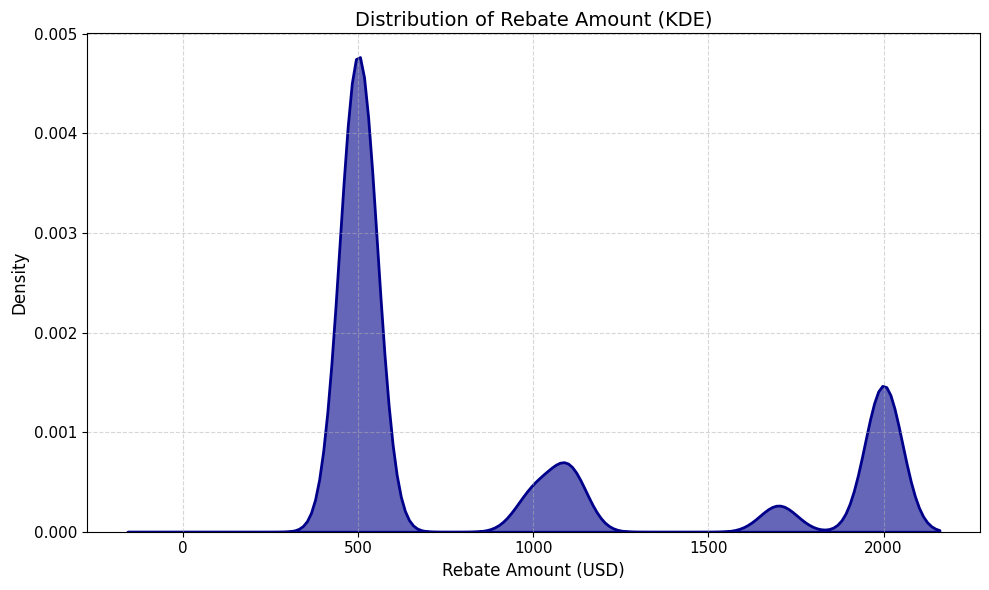

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df,
    x='Rebate_Amount',
    fill=True,
    color='darkblue',
    linewidth=2,
    alpha=0.6
)

plt.title('Distribution of Rebate Amount (KDE)', fontsize=14)
plt.xlabel('Rebate Amount (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


### Analysis Result:
The KDE plot shows that most rebate amounts cluster sharply around $500, making it the most common rebate given. We also see smaller peaks near $1000 and $2000, suggesting standard rebate tiers rather than random values. The dip in between tells us that mid-range rebates were rare. This likely reflects a structured incentive program with fixed amounts based on eligibility or vehicle type. Overall, the distribution hints at a policy-driven approach to rebate allocation.

## Objective 4
### Identifying the Top 10 Counties with the Most EV Rebates
This visualization focuses on showcasing the top 10 counties in California based on the number of electric vehicle (EV) rebates distributed. By examining these counties, we can better understand where EV programs are most actively utilized, which may reflect regional interest, accessibility, or policy influence regarding clean transportation.


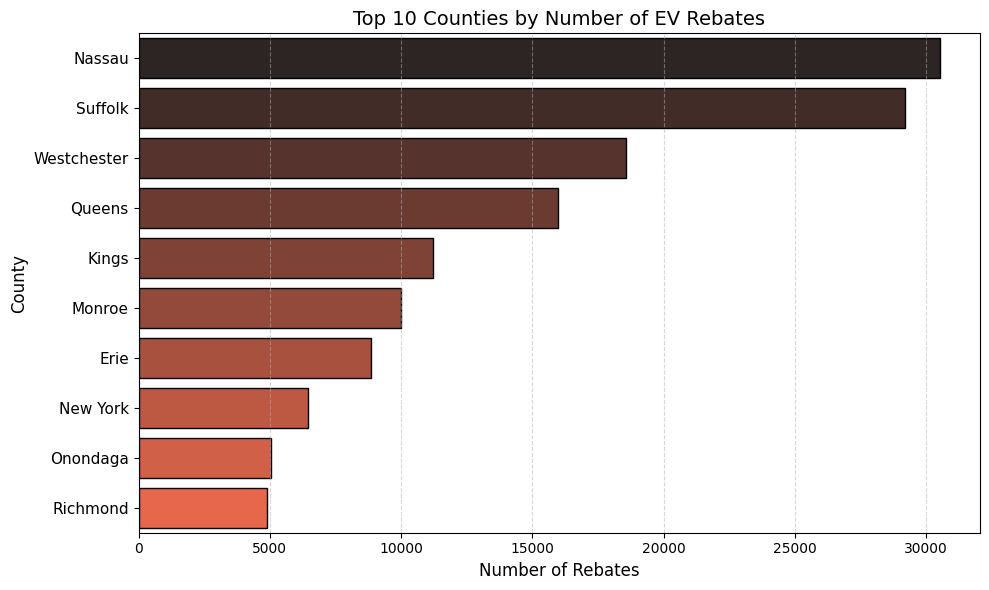

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Get top 10 counties
top_counties = df['County'].value_counts().nlargest(10).reset_index()
top_counties.columns = ['County', 'Rebate_Count']

# Plot
sns.barplot(
    data=top_counties,
    y='County',
    x='Rebate_Count',
    hue='County',  
    palette='dark:#FF5733',
    edgecolor='black',
    legend=False   
)


plt.title('Top 10 Counties by Number of EV Rebates', fontsize=14)
plt.ylabel('County', fontsize=12)
plt.xlabel('Number of Rebates', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## Analysis Result:
Nassau and Suffolk counties are leading the charge in EV adoption, with each surpassing 29,000 rebates. These are followed by Westchester and Queens, showing strong engagement in suburban and urban areas. Kings and Monroe also reflect decent uptake. The pattern suggests higher rebates are concentrated in downstate NY, possibly due to population density, income levels, or better EV infrastructure. This regional insight can help guide where future rebate promotions or charging stations could have the most impact.

## Objective5 :
### Analyze the distribution of rebate amounts across different EV types.
This violin plot visualizes how the rebate amounts vary for each type of electric vehicle (EV). It combines a box plot with a kernel density estimate to show the spread, central tendency, and distribution shape for each EV category.



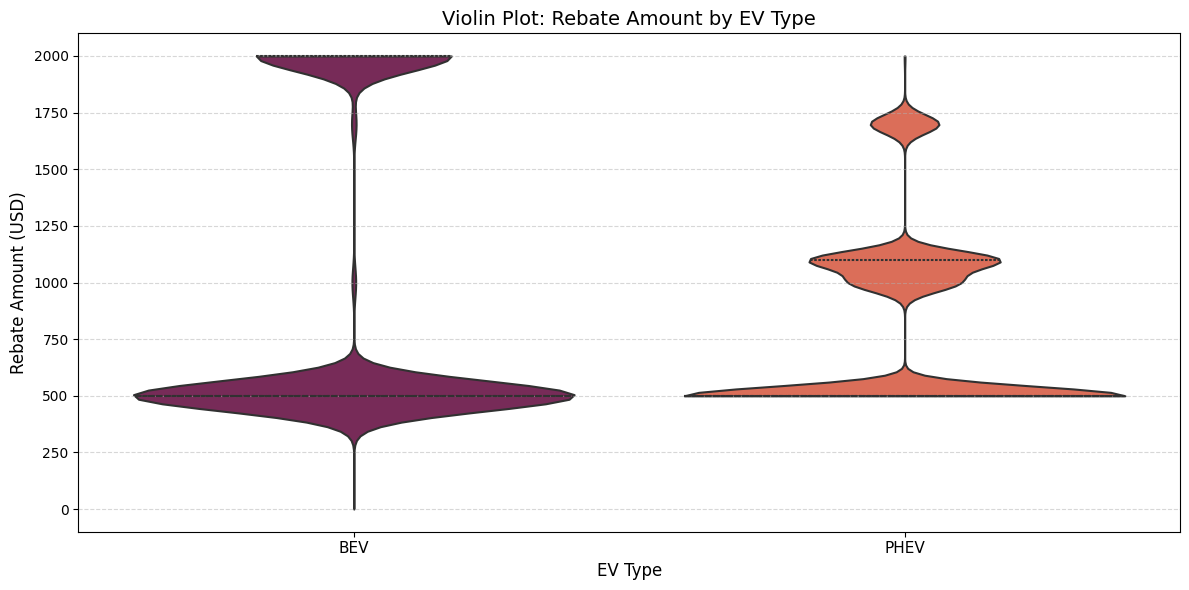

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df,
    x='EV_Type',
    y='Rebate_Amount',
    hue='EV_Type',        
    palette='rocket',       
    linewidth=1.5,
    inner='quartile',
    cut=0,
    dodge=False            
)


plt.legend([], [], frameon=False)  
plt.title('Violin Plot: Rebate Amount by EV Type', fontsize=14)
plt.xlabel('EV Type', fontsize=12)
plt.ylabel('Rebate Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.show()


## Analysis Result:
The violin plot shows that Battery Electric Vehicles (BEVs) generally receive higher rebates compared to Plug-in Hybrid Electric Vehicles (PHEVs). BEVs have a wider spread and higher quartile ranges, indicating greater variability and higher average incentive amounts. PHEVs, on the other hand, are more tightly grouped with lower rebate values. This likely reflects policy priorities favoring full electric adoption. The visual clearly highlights how rebate strategies differ based on vehicle technology.